<a href="https://colab.research.google.com/github/paulgureghian/Google_Colab_Notebooks/blob/master/Load_image_data_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Created by Paul A. Gureghian on 11/29/18.**

**Load image data using PyTorch.**





In [0]:
### Install PyTorch and CUDA
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [10]:
### Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### Import 'helper' module 
import imp 
helper = imp.new_module('helper')
exec(open("/content/drive/My Drive/Helper/helper.py").read(), helper.__dict__)

In [0]:
### Import packages 
import PIL 
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [0]:
### Load images
data_dir = "/content/drive/My Drive/Cat_Dog_data/Cat_Dog_data"

### Define transforms for the training and testing data 
train_transforms = transforms.Compose([transforms.RandomRotation(30), transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(), transforms.ToTensor()]) 
test_transforms = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()]) 

### Build the dataloaders
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

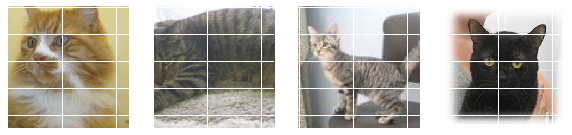

In [18]:
### Test the trainloader 
dataiter = iter(testloader)

images, labels = next(dataiter)

fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)